In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
file_location = 'SCDB_2023_01_justiceCentered_Citation/SCDB_2023_01_justiceCentered_Citation.csv'
data = pd.read_csv(file_location,encoding='ISO-8859-1')
data.head()

C:\Users\hvurq\AppData\Local\Temp\ipykernel_8592\100411058.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_location,encoding='ISO-8859-1')


,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [29]:
#visualizing the columns
data.columns

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes', 'justice', 'justiceName', 'vote',
       'opinion', 'direction', 'majority', 'firstA

In [30]:
#Creating a Data Frame to save the time series
sub_temporal = data[['dateDecision','decisionDirection']]
sub_temporal = sub_temporal.drop(sub_temporal[sub_temporal.decisionDirection==3].index)
#sub_temporal.decisionDirection[sub_temporal.decisionDirection==3]=0
temporal_dic = {
    'dateDecision':[],
    'decisionDirection':[],
}
#Convert dictionary to Data Frame
temporal = pd.DataFrame(temporal_dic)
#Take only the unique dates
temporal.dateDecision = sub_temporal.dateDecision.unique()
temporal.head()

,dateDecision,decisionDirection
0,11/18/1946,NaN
1,11/25/1946,NaN
2,12/9/1946,NaN
3,12/16/1946,NaN
4,12/23/1946,NaN


In [31]:
#For every unique date in take the mean value of the decisions in the day
for date_ in temporal.dateDecision:
    tmp = sub_temporal[sub_temporal.dateDecision==date_]
    temporal['decisionDirection'][temporal['dateDecision']==date_] = np.mean(tmp.decisionDirection)
temporal.head()

C:\Users\hvurq\AppData\Local\Temp\ipykernel_8592\3424520262.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temporal['decisionDirection'][temporal['dateDecision']==date_] = np.mean(tmp.decisionDirection)
C:\Users\hvurq\AppData\Local\Temp

,dateDecision,decisionDirection
0,11/18/1946,1.666667
1,11/25/1946,1.750000
2,12/9/1946,1.555556
3,12/16/1946,1.666667
4,12/23/1946,1.500000


In [32]:
#saving the file with temporal series for further use
temporal.to_csv('temporal_series_with_mean.csv',sep=';',index=False)

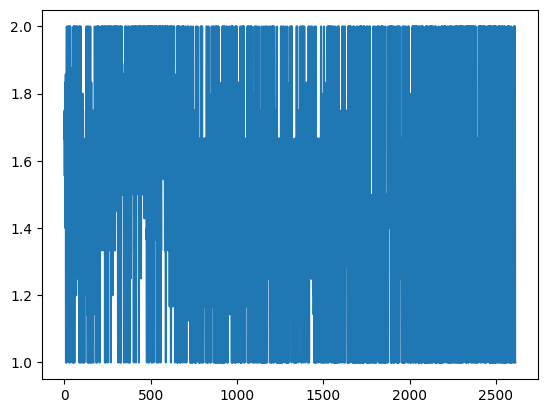

In [33]:
plt.plot(temporal['decisionDirection'])